In [142]:
import pandas as pd

# Loading the csv files into DataFrames
goals = pd.read_csv("goals.csv")
matches = pd.read_csv("matches.csv")
assists = pd.read_csv("assists.csv")

In [143]:
# Checking for null values in Dataset 
goals.isnull().sum()

Player    0
Team      0
Goals     0
dtype: int64

In [144]:
matches.isnull().sum()

match_number                 0
team1                        0
team2                        0
date_of_match                0
stadium                      0
team1_goals                  0
team2_goals                  0
audience                     0
team1_total_shots            0
team1_shots_on_target        0
team2_total_shots            0
team2_shots_on_target        0
team1_fouls                  0
team1_corners                0
team1_blocked_shots          0
team1_passes                 0
team1_accurate_passes        0
team1_accurate_long_balls    0
team1_accurate_crosses       0
team1_throws                 0
team1_offsides               0
team1_yellowcards            0
team1_red_cards              0
team1_tackles_won            0
team1_interceptions          0
team1_blocks                 0
team1_clearances             0
team1_keeper_saves           0
team1_duels_won              0
team1_successful_dribbles    0
team2_accurate_passes        0
team2_fouls_committed        0
team2_co

In [145]:
assists.isnull().sum()

Player     0
Team       0
Assists    0
dtype: int64

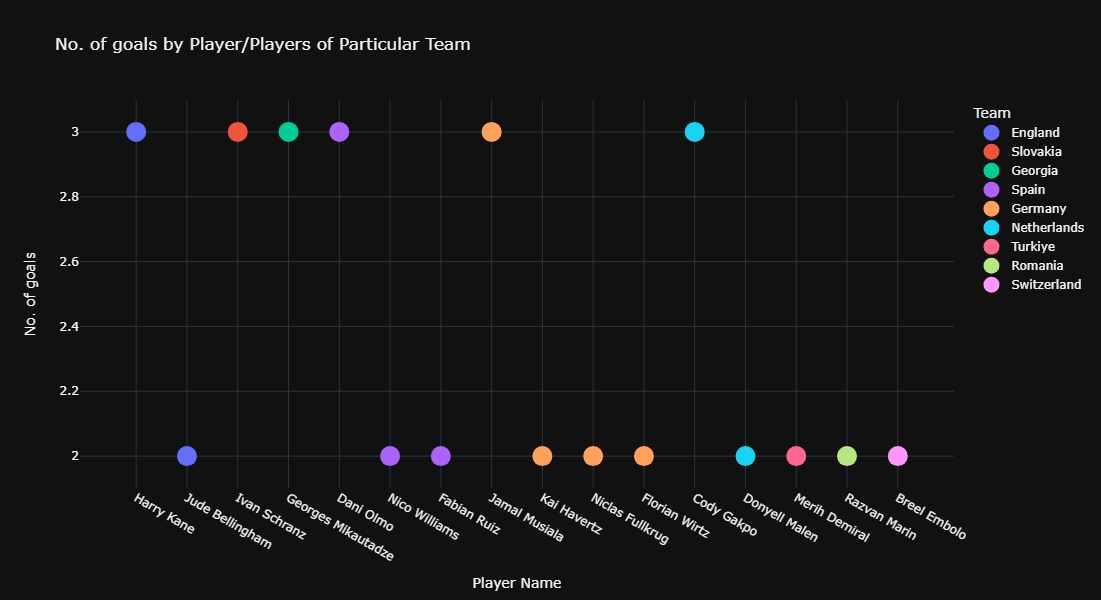

In [146]:
import plotly.graph_objects as go 
import plotly.io as pio
import plotly.express as px

pio.templates.default = "plotly_dark"

# calculating no. of goals by players of different team
fig = px.scatter(goals, x='Player', y='Goals',
                 color='Team ',
                 labels={'Player': 'Player Name', 'Goals': 'No. of goals'},
                 title='No. of goals by Player/Players of Particular Team')

# Customize the layout of the scatter plot
fig.update_layout(width=800, height=600)
fig.update_traces(marker_size=20)
fig.show()

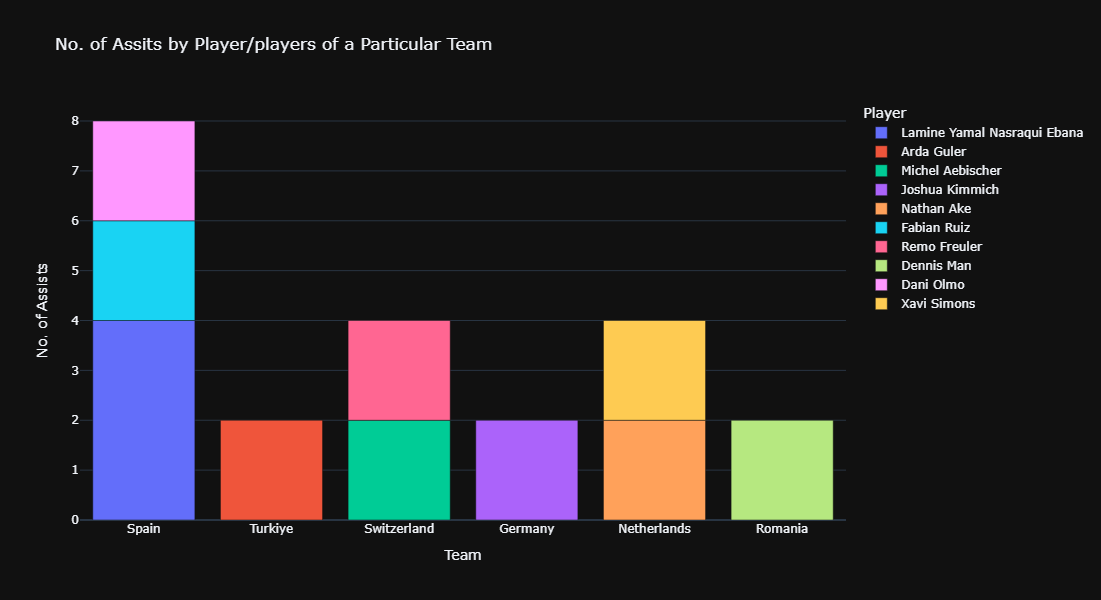

In [147]:
# Calculating no. of assists by players of different team
fig = px.bar(assists, x="Team", y="Assists", color="Player", title="No. of Assits by Player/players of a Particular Team",
                  labels={'Team': 'Team', 'Assists': 'No. of Assists'})

fig.update_layout(width=800, height=600)

fig.show()

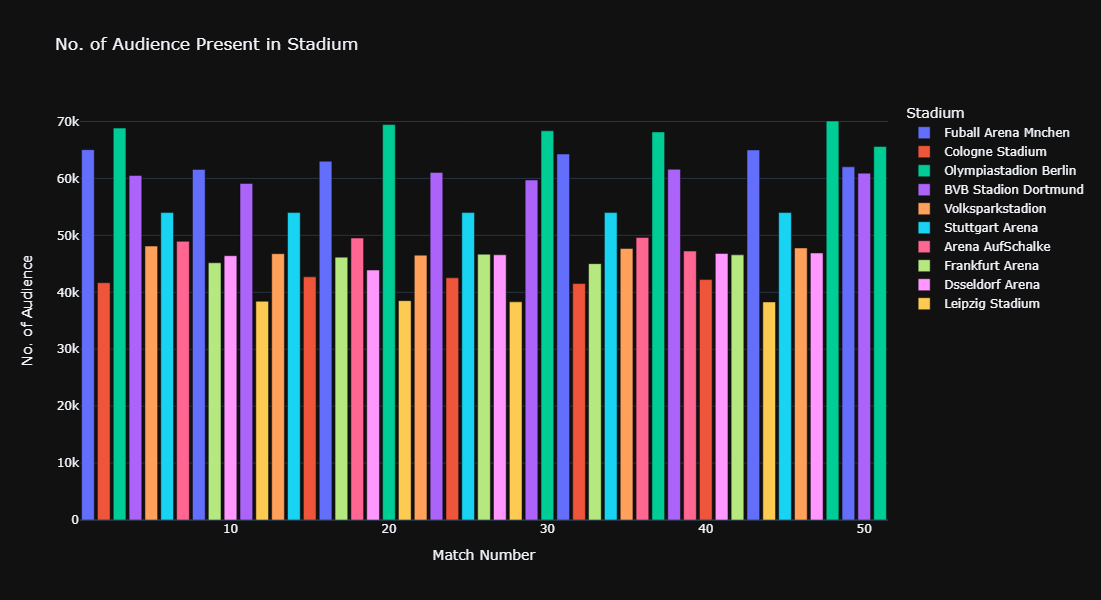

In [150]:
# Removing commas from audience number so that no error arises
matches['audience'] = matches['audience'].str.replace(',', '').astype(float)

# Converting Audience to numeric type
matches['audience'] = pd.to_numeric(matches['audience'])
Audience_Present_stadium = matches.groupby(['match_number','stadium'])['audience'].mean().reset_index()

# Calculating attendance of audience in different stadiums
fig = px.bar(matches, x="match_number", y="audience", color='stadium',
            labels={'match_number': 'Match Number', 'audience': 'No. of Audience', 'stadium': 'Stadium'},
              title='No. of Audience Present in Stadium')

fig.update_layout(yaxis={'categoryorder': 'total ascending'},
                  xaxis_tickangle=0,
                  width=1000,
                  height=600)
fig.show()

In [151]:
# Creating a column named result to showcase which team won or lost, or match ended up in Draw
matches['Result'] = matches.apply(
    lambda row: row['team1'] if row['team1_goals'] > row['team2_goals'] else (row['team2'] if row['team1_goals'] < row['team2_goals'] else 'Draw'), 
    axis=1
)

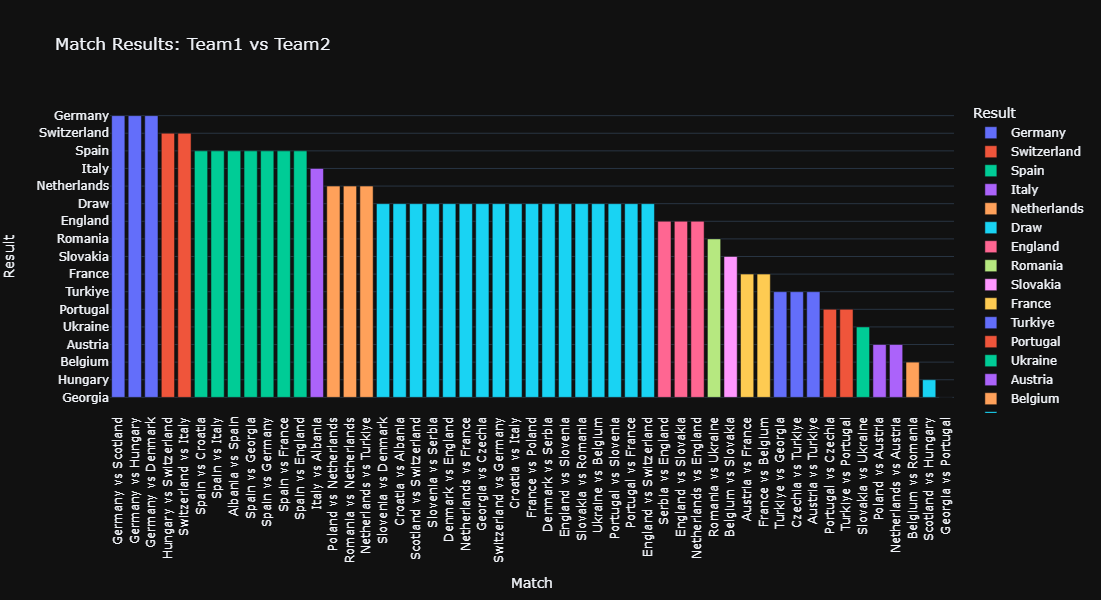

In [152]:
# Creating a column named match team1 vs team2 will be displayed
matches['match'] = matches['team1'] + ' vs ' + matches['team2']

# Creating a bar chart showcasing team1 vs team2 and their end result
fig = px.bar(matches, x='match', y='Result', color='Result', 
             labels={'match': 'Match', 'Result': 'Result'},
             title='Match Results: Team1 vs Team2')

# Customize the layout of the bar chart
fig.update_layout(xaxis_tickangle=-90,
                  width=1000,
                  height=600)

# Show the figure
fig.show()